<a href="https://colab.research.google.com/github/jackjameswillis/Hopfield/blob/main/Hopfield_to_rHN_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook serves as an introduction to the relaxing Hopfield Network with Hebbian learning. Reading the work of Richard Watson is encouraged on this topic, as it lays the foundation for a richer understanding of the possibilities associated with these systems.

We work from the Hopfield Network, adding parts at a time. Please note that the discussion of subtleties is left to the literature, which will do a better job than I at providing more rigorous understanding. Think of this as a crash course. I would recommend using a low $N$ at first so that the weight matrix calculations can be seen clearer, i've been using $N = 5$. However, to illustrate clearly in the final graphs what's going on you should set $N$ to be some larger number, such as $N = 20$.

# Hopfield Network

A Hopfield Network is a recurrent neural network with symmetric weights and a zero diagonal. A network has $N$ nodes.



In [1]:
N = 20

These nodes are fully connected to form the weights $W$. They form the dynamics by which the state of the network will depend. Hopfield Networks are known as associative memories because you can set the weights such that data can be remembered.

If we define random weights, we are defining a random dynamics to the network, and so will not do anything useful, but we will define a network in this way for reasons that will become clear later.

In [2]:
import numpy as np

W = np.random.uniform(low = -1, 
                      
                      high = 1, 
                      
                      size = (N, N))

These weights aren't symmetric or zeroed on the diagonal.

In [3]:
topology = 1 - np.diag(np.ones(N))

topology

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.

This represents the fully connected topology of the network and will be used later.

In [4]:
W = np.triu(W)

W

array([[-0.96801092, -0.12648044, -0.69320446, -0.53678723,  0.05641244,
         0.35820394,  0.89736286,  0.28222974,  0.57475973,  0.46611965,
         0.41609303, -0.23038741, -0.2975863 , -0.95880346, -0.11621741,
        -0.21512442,  0.45962263, -0.70877524,  0.89809484, -0.26144252],
       [ 0.        , -0.18785323,  0.04800544, -0.30194064,  0.95647185,
         0.4115868 , -0.37013607,  0.33181536, -0.05455134,  0.46939877,
        -0.70777516, -0.05232711,  0.48534491,  0.16622189, -0.99177423,
         0.78815068,  0.6038034 ,  0.04175109,  0.84379856, -0.06373284],
       [ 0.        ,  0.        ,  0.8654953 , -0.08016981, -0.83266933,
        -0.00466126, -0.14523914,  0.96322511,  0.23190926,  0.41101617,
         0.38354433,  0.72680432, -0.45962673, -0.13911746, -0.58883652,
         0.77943806, -0.52044193, -0.59534613,  0.83242933, -0.1687078 ],
       [ 0.        ,  0.        ,  0.        ,  0.29426293, -0.44804195,
        -0.2121137 ,  0.71469992, -0.61353057, -

If unclear from the size of your network, the lower triangle of the weights has been removed.

In [5]:
W = W + W.T

W

array([[-1.93602183, -0.12648044, -0.69320446, -0.53678723,  0.05641244,
         0.35820394,  0.89736286,  0.28222974,  0.57475973,  0.46611965,
         0.41609303, -0.23038741, -0.2975863 , -0.95880346, -0.11621741,
        -0.21512442,  0.45962263, -0.70877524,  0.89809484, -0.26144252],
       [-0.12648044, -0.37570645,  0.04800544, -0.30194064,  0.95647185,
         0.4115868 , -0.37013607,  0.33181536, -0.05455134,  0.46939877,
        -0.70777516, -0.05232711,  0.48534491,  0.16622189, -0.99177423,
         0.78815068,  0.6038034 ,  0.04175109,  0.84379856, -0.06373284],
       [-0.69320446,  0.04800544,  1.73099061, -0.08016981, -0.83266933,
        -0.00466126, -0.14523914,  0.96322511,  0.23190926,  0.41101617,
         0.38354433,  0.72680432, -0.45962673, -0.13911746, -0.58883652,
         0.77943806, -0.52044193, -0.59534613,  0.83242933, -0.1687078 ],
       [-0.53678723, -0.30194064, -0.08016981,  0.58852586, -0.44804195,
        -0.2121137 ,  0.71469992, -0.61353057, -

Again, if unclear from the size of your network, the weights have been made symmetric.

In [6]:
W = W * topology

W

array([[-0.        , -0.12648044, -0.69320446, -0.53678723,  0.05641244,
         0.35820394,  0.89736286,  0.28222974,  0.57475973,  0.46611965,
         0.41609303, -0.23038741, -0.2975863 , -0.95880346, -0.11621741,
        -0.21512442,  0.45962263, -0.70877524,  0.89809484, -0.26144252],
       [-0.12648044, -0.        ,  0.04800544, -0.30194064,  0.95647185,
         0.4115868 , -0.37013607,  0.33181536, -0.05455134,  0.46939877,
        -0.70777516, -0.05232711,  0.48534491,  0.16622189, -0.99177423,
         0.78815068,  0.6038034 ,  0.04175109,  0.84379856, -0.06373284],
       [-0.69320446,  0.04800544,  0.        , -0.08016981, -0.83266933,
        -0.00466126, -0.14523914,  0.96322511,  0.23190926,  0.41101617,
         0.38354433,  0.72680432, -0.45962673, -0.13911746, -0.58883652,
         0.77943806, -0.52044193, -0.59534613,  0.83242933, -0.1687078 ],
       [-0.53678723, -0.30194064, -0.08016981,  0.        , -0.44804195,
        -0.2121137 ,  0.71469992, -0.61353057, -

The diagonal has been zeroed.

Our network of $N$ nodes has a state vector $S \in \{-1|1\}^{N \times 1}$.

In [7]:
S = np.random.choice(a = (-1, 1),
                     
                     size = (N, 1))

S

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1]])

In order to progress our network, we randomly sample a node from the network and change it via our update equation:

$$S_{i}(t + 1) = \text{sign}(W_{i} \cdot S(t))$$

In [8]:
def update(W, S, i):

  S[i] = np.sign(W[i] @ S)

  return S

A total number of state updates T must be defined.

In [9]:
T = 10 * N

When this update rule is applied to a Hopfield Network, it is said to minimize an energy function E:

$$E(t) = -\frac{(S(t)^{T} \cdot W(0)) \cdot S(t)}{2}$$

In [10]:
def E(W0, S):

  return -((S.T @ W0) @ S) / 2

So that given enough time the state will update into a state at a local minima in the energy landscape. Since a normal Hopfield Network does not alter its weights through time, for now $W(0) = W$.

In [11]:
E_t = np.arange(T)

S_t = np.zeros((T, N, 1))

In [12]:
E_t[0] = E(W, S)

for t in range(1, T):

  i = np.random.randint(0, N)

  S = update(W, S, i)

  S_t[t] = S

  E_t[t] = E(W, S)

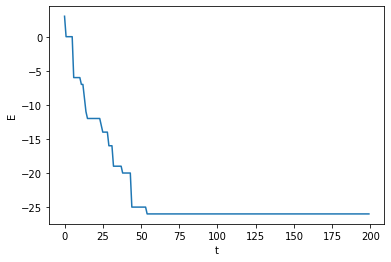

In [13]:
import matplotlib.pyplot as plt

plt.plot(E_t)

plt.xlabel('t')

plt.ylabel('E')

plt.show()

This graph shows the energy of the network decreasing through time as the state gets updated.

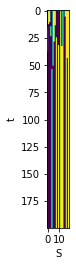

In [14]:
# S_t has shape (T, N, 1), S_t.T has shape (1, N, T), S_t.T[0] has shape (N, T), S_t.T[0].T has shape (T, N)
plt.imshow(S_t.T[0].T)

plt.xlabel('S')

plt.ylabel('t')

plt.show()

This image shows the state of the network changing through time. From the update function, we take the sign of the dot product between the weights and the state, so dark is $-1$ and light is $1$.

We can look at the energy through time for a random selection of states. When we are considering each of these states, we can think of them as nodes in tension, and the network being released to resolve its tension by its own dynamics. We will call the states perturbations of our network, and define relaxations as periods of time where the network is allowed to update $T$ times.

In [15]:
relaxations = 100

perturbations = np.random.choice((-1, 1), (relaxations, N, 1))

E_t = np.zeros((relaxations, T))

for relaxation in range(relaxations):

  S = perturbations[relaxation]

  E_t[relaxation, 0] = E(W, S) 

  for t in range(1, T):

    i = np.random.randint(0, N)

    S = update(W, S, i)

    E_t[relaxation, t] = E(W, S)

In [16]:
energy = {'rHN-0': E_t}

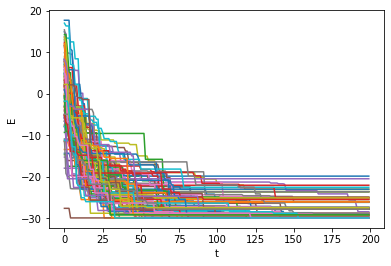

In [17]:
plt.plot(E_t.T)

plt.xlabel('t')

plt.ylabel('E')

plt.show()

What we have so far is an asynchronous (because we select one node to update at a time) discrete (the number of states is discrete) relaxing Hopfield Network, known by rHN-0.

Consider this illustrative example to embbed these networks in reality. In the sport of climbing, it is important to have a community of people who can push you to go further. Some people challenge you and rival you, some people give advice. There are also people you don't vibe with, and you want to avoid them. Imagine a population of climbers as nodes on a network, and their value depends on which of two climbing gyms they're at:

* -1 if they're at Boulder Brighton
* 1 if they're at HighSports

The network is fully connected, and the weights correspond to how beneficial it is for climber i's climbing ability to be around climber j. If climber j is at Boulder Brighton and it is beneficial for climber i to be around them (positive weight, such as 0.5), then climber j's contribution to climber i's update will be negative:

$$W_{i,j}S_{j},$$

substituting $W_{i,j} = 0.5$, $S_{j} = -1$, we get a contribution of $-0.5$. This means that climber $j$ has a pulling effect on climber $i$ towards the value of climber $j$. A random state would be equivalent to placing the population randomly between the two gyms. The random weights decide random amounts of benefit between members of the population.

The next step is to allow each climber to have habits, in the sense that they begin to be drawn towards climbers they find themselves around after their network has 'relaxed'. We can do this via Hebbian learning, which has us update the weights by:

$$W(t + 1) = W(t) + r(S(t)S(t)^{T})\text{topology},$$

where $r$ is a learning rate.

In [18]:
perturbations = np.random.choice((-1, 1), (relaxations, N, 1))

E_t = np.zeros((relaxations, T))

# Now that weights are changing, we record the original weights
W0 = W

r = 0.01 / 10 * N

for relaxation in range(relaxations):

  S = perturbations[relaxation]

  E_t[relaxation, 0] = E(W0, S) 

  for t in range(1, T):

    i = np.random.randint(0, N)

    S = update(W, S, i)

    E_t[relaxation, t] = E(W0, S)

  deltaW = r * (S @ S.T)

  W = (W + deltaW) * topology

In [19]:
energy['rHN-S'] = E_t

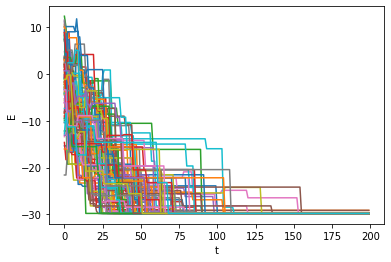

In [20]:
plt.plot(E_t.T)

plt.xlabel('t')

plt.ylabel('E')

plt.show()

In [21]:
print(f'Minimum Final Energy rHN-0: {np.min(energy["rHN-0"])}')
print(f'Mean Final Energy rHN-0: {np.mean(energy["rHN-0"])}')

Minimum Final Energy rHN-0: -29.925237435716376
Mean Final Energy rHN-0: -24.750251442113683


In [22]:
print(f'Minimum Final Energy rHN-S: {np.min(energy["rHN-S"])}')
print(f'Mean Final Energy rHN-S: {np.mean(energy["rHN-S"])}')

Minimum Final Energy rHN-S: -29.925237435716376
Mean Final Energy rHN-S: -25.987180032879294


If we let each climber tend towards seeing climbers they've seen previously again, they seem to arrive at states where especially good global benefit is seen (low energy) regardless of the state they start in. We can look at the energy distribution of relaxed states before and after learning.

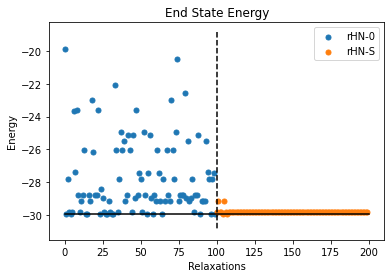

In [23]:
plt.scatter(np.arange(len(energy['rHN-0'])), energy['rHN-0'][:, -1], label='rHN-0', s=len(energy['rHN-0'])/4)

plt.scatter(np.arange(len(energy['rHN-0']), len(energy['rHN-0'])*2), energy['rHN-S'][:, -1], label='rHN-S', s=len(energy['rHN-0'])/4)

plt.plot([relaxations, relaxations], [np.max(energy['rHN-0'][:, -1]) + 1, np.min(energy['rHN-S'][:, -1]) - 1], '--', color='black')

plt.title('End State Energy')

plt.xlabel('Relaxations')

plt.ylabel('Energy')

plt.legend()

plt.plot((0, relaxations * 2),(np.min(energy['rHN-0'][:, -1]), np.min(energy['rHN-0'][:, -1])), color='black')

plt.show()

We can see from this graph that learning causes more final states of the network to be low energy.

The low energy states the network dynamics lead to are called point attractors. If we think about the space of all possible states of a network of this type, point attractors have what's known as an attractor basin, which is a volume around the state in state space. All states within the volume of the basin of attraction will, through the dynamics of the network, change into the point attractor. In associative memory Hopfield Networks, the network remembers a state by making the attractor basin for the memory state larger.

In Hebbian learning on rHN-S, we let the dynamics of the network change the state to a point attractor, then we enlarge the basin of attraction for the point attractor, making it more likely that we arrive at this state again from other initial states. Therefore, rHN-S uses Hebbian learning to model the attractors it already has, enlarging the basins in proportion to the frequency that the point attractor is visited.

Applying this to the climbing example, each climber dynamically changes climbing gym to gain as much benefit as possible. Once all the climbers have settled, their organisation is a point attractor. Each individual then remembers that this is a configuration of the population they've seen, so that the next time they are randomly distributed between the two gyms, they are more likely to dynamically change to the previous point attractor.

This is beneficial for the climbers because the benefit afforded to the population of climbers is more regularly high if they are more likely to traverse to a low energy state.

Enlarging attractor basins in this way gives rise to the notion of spurious attractors, these being the attractor basins of states that share some but not all of the features of states whos basins of attraction have been enlarged. States are then attracted to the spurious attractors even when the states of the attractors haven't been explicitly visited and learned.

Through the notion of spurious attractors we have the posibility of enlarging attractor basins we would otherwise not visit. The states spurious attractor states give the network the opportunity to learn a final configuration that has lower energy than any other attractor basin visited.

The population of climbers might find that when certain individuals are together at the same gym global benefit increases, so they learn to occupy this kind of state more often. Further, they may find that when another group of climbers is at the opposite gym to the original group that global benefit increases and so they learn this state. Calling the original group A and the other group B, the attractor basins created by learning the behaviour of these two groups could create a spurious attractor between the two basins, one where the state for the attractor makes it such that groups A and B go to their respective high performance gyms every time. Assuming there are no drawback to doing so, this organisation change leads to the benefit of the behaviour from each group seperately to be combined into one lower energy, higher benefit behaviour.

Discovering such an attractor requires that the initial states regularly enlarge the spurious attractor until it is likely to be visited and then directly learned. 